### Python Mini Project 2: Simulated Stock Trading Bot

**Objective:** Create a Python script that simulates trading over a dataset containing historical stock prices. The bot will decide whether to buy, hold, or sell based on the momentum calculated as the difference between the current price and the average price of the last few days.

#### **Import Libraries**
This cell imports all the necessary modules for the project, including `datetime` for handling dates, `random` for data simulation, and `matplotlib.pyplot` for plotting.

In [1]:
import datetime
import random
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


#### **Data Structure - Generate Historical Stock Data**
Here, we create a simulated historical stock price dataset. In a real application, this data would come from an external source (CSV, API, database). We add some `price_volatility` to make the data more realistic.

In [3]:
start_date = datetime.date(2023, 1, 1)
historical_data = []
base_price = 100.0
price_volatility = 2.0 # Represents the daily price fluctuation

for i in range(30): # Generate 30 days of data
    current_date = start_date + datetime.timedelta(days=i)
    # Simulate price fluctuation around the base price
    current_price = base_price + random.uniform(-price_volatility, price_volatility)
    historical_data.append({
        "date": current_date,
        "price": round(current_price, 2) # Round to 2 decimal places
    })
    # Add a small daily drift to the base price for some trend
    base_price += random.uniform(-0.5, 0.7)

print("--- Generated Historical Stock Data ---")
for day_data in historical_data:
    print(f"Date: {day_data['date']}, Price: ${day_data['price']:.2f}")
print("-" * 40)

--- Generated Historical Stock Data ---
Date: 2023-01-01, Price: $99.76
Date: 2023-01-02, Price: $98.09
Date: 2023-01-03, Price: $101.58
Date: 2023-01-04, Price: $102.06
Date: 2023-01-05, Price: $101.20
Date: 2023-01-06, Price: $99.64
Date: 2023-01-07, Price: $100.61
Date: 2023-01-08, Price: $102.84
Date: 2023-01-09, Price: $101.40
Date: 2023-01-10, Price: $99.24
Date: 2023-01-11, Price: $99.41
Date: 2023-01-12, Price: $99.08
Date: 2023-01-13, Price: $102.80
Date: 2023-01-14, Price: $102.74
Date: 2023-01-15, Price: $100.08
Date: 2023-01-16, Price: $102.82
Date: 2023-01-17, Price: $100.36
Date: 2023-01-18, Price: $103.33
Date: 2023-01-19, Price: $101.26
Date: 2023-01-20, Price: $100.22
Date: 2023-01-21, Price: $101.82
Date: 2023-01-22, Price: $103.12
Date: 2023-01-23, Price: $103.36
Date: 2023-01-24, Price: $101.00
Date: 2023-01-25, Price: $103.73
Date: 2023-01-26, Price: $102.65
Date: 2023-01-27, Price: $102.32
Date: 2023-01-28, Price: $104.30
Date: 2023-01-29, Price: $101.20
Date: 202

#### **Trading Bot Configuration**
This cell sets up the initial parameters for our trading bot and portfolio, including starting cash, shares held, and the thresholds for making trading decisions.

In [4]:
initial_cash = 10000.0
shares_held = 0 # Starting with no shares
momentum_lookback_days = 5 # Number of past days to consider for momentum
buy_threshold = 0.5 # Price difference to trigger a buy action
sell_threshold = -0.5 # Price difference to trigger a sell action
trade_quantity = 10 # Number of shares to buy/sell per trade
transaction_fee_per_trade = 5.0 # Flat fee per transaction

print("Trading bot configuration loaded.")
print(f"Initial Cash: ${initial_cash:.2f}")
print(f"Momentum Lookback Period: {momentum_lookback_days} days")

Trading bot configuration loaded.
Initial Cash: $10000.00
Momentum Lookback Period: 5 days


#### **Trading Simulation and Momentum Calculation**
This is the core of the trading bot. It iterates through the historical data, calculates momentum (the difference between current price and average past price), and makes buy, sell, or hold decisions based on predefined thresholds. Portfolio values are tracked for later analysis.

In [5]:
print("\n--- Starting Trading Simulation ---")

current_cash = initial_cash
current_shares = shares_held

# Lists to store historical values for plotting
portfolio_value_history = []
stock_price_history = []
dates_history = []

for i, daily_data in enumerate(historical_data):
    current_date = daily_data["date"]
    current_price = daily_data["price"]

    # Store current day's data for plotting later
    dates_history.append(current_date)
    stock_price_history.append(current_price)

    # Only start trading after enough data for momentum calculation is available
    if i >= momentum_lookback_days:
        # Get prices for the last N days (excluding the current day's price)
        past_prices = [historical_data[j]["price"] for j in range(i - momentum_lookback_days, i)]
        average_past_price = sum(past_prices) / momentum_lookback_days

        momentum = current_price - average_past_price

        print(f"\nDate: {current_date}, Price: ${current_price:.2f}")
        print(f"  Avg Last {momentum_lookback_days} Days: ${average_past_price:.2f}, Momentum: ${momentum:.2f}")
        print(f"  Current Portfolio: Cash=${current_cash:.2f}, Shares={current_shares}")

        # Trading Logic
        if momentum > buy_threshold:
            cost_of_trade = (trade_quantity * current_price) + transaction_fee_per_trade
            if current_cash >= cost_of_trade: # Check if enough cash is available
                current_cash -= cost_of_trade
                current_shares += trade_quantity
                print(f"  ACTION: BUY {trade_quantity} shares at ${current_price:.2f}.")
            else:
                print("  ACTION: HOLD (Insufficient cash to buy)")
        elif momentum < sell_threshold:
            if current_shares >= trade_quantity: # Check if enough shares are held
                revenue_from_trade = (trade_quantity * current_price) - transaction_fee_per_trade
                current_cash += revenue_from_trade
                current_shares -= trade_quantity
                print(f"  ACTION: SELL {trade_quantity} shares at ${current_price:.2f}.")
            else:
                print("  ACTION: HOLD (Insufficient shares to sell)")
        else:
            print("  ACTION: HOLD (Momentum within thresholds)")
    else:
        print(f"\nDate: {current_date}, Price: ${current_price:.2f}")
        print(f"  (Gathering more data for momentum calculation)")

    # Update portfolio value for plotting at the end of each day
    current_portfolio_value = current_cash + (current_shares * current_price)
    portfolio_value_history.append(current_portfolio_value)

print("\n--- Trading Simulation Completed ---")


--- Starting Trading Simulation ---

Date: 2023-01-01, Price: $99.76
  (Gathering more data for momentum calculation)

Date: 2023-01-02, Price: $98.09
  (Gathering more data for momentum calculation)

Date: 2023-01-03, Price: $101.58
  (Gathering more data for momentum calculation)

Date: 2023-01-04, Price: $102.06
  (Gathering more data for momentum calculation)

Date: 2023-01-05, Price: $101.20
  (Gathering more data for momentum calculation)

Date: 2023-01-06, Price: $99.64
  Avg Last 5 Days: $100.54, Momentum: $-0.90
  Current Portfolio: Cash=$10000.00, Shares=0
  ACTION: HOLD (Insufficient shares to sell)

Date: 2023-01-07, Price: $100.61
  Avg Last 5 Days: $100.51, Momentum: $0.10
  Current Portfolio: Cash=$10000.00, Shares=0
  ACTION: HOLD (Momentum within thresholds)

Date: 2023-01-08, Price: $102.84
  Avg Last 5 Days: $101.02, Momentum: $1.82
  Current Portfolio: Cash=$10000.00, Shares=0
  ACTION: BUY 10 shares at $102.84.

Date: 2023-01-09, Price: $101.40
  Avg Last 5 Days: 

#### **Performance Evaluation**
After the simulation, this cell calculates the final value of the bot's portfolio and determines its net gain or loss compared to the initial investment.

In [6]:
print("\n--- Simulation End Summary ---")

# Calculate final portfolio value based on the last recorded stock price
final_portfolio_value = current_cash + (current_shares * historical_data[-1]["price"])

print(f"\nInitial Portfolio Value: ${initial_cash:.2f}")
print(f"Final Cash: ${current_cash:.2f}")
print(f"Final Shares Held: {current_shares}")
print(f"Final Portfolio Value (including shares): ${final_portfolio_value:.2f}")

performance_gain_loss = final_portfolio_value - initial_cash
print(f"Net Gain/Loss: ${performance_gain_loss:.2f}")

if performance_gain_loss > 0:
    print("The bot made a profit!")
elif performance_gain_loss < 0:
    print("The bot incurred a loss.")
else:
    print("The bot broke even.")


--- Simulation End Summary ---

Initial Portfolio Value: $10000.00
Final Cash: $8677.00
Final Shares Held: 10
Final Portfolio Value (including shares): $9695.80
Net Gain/Loss: $-304.20
The bot incurred a loss.


#### **Plotting Performance**
This cell uses `matplotlib` to generate a line plot, visualizing both the stock's price movement and the bot's portfolio value over the simulated period. This helps in visually assessing the strategy's performance.


--- Generating Performance Chart ---


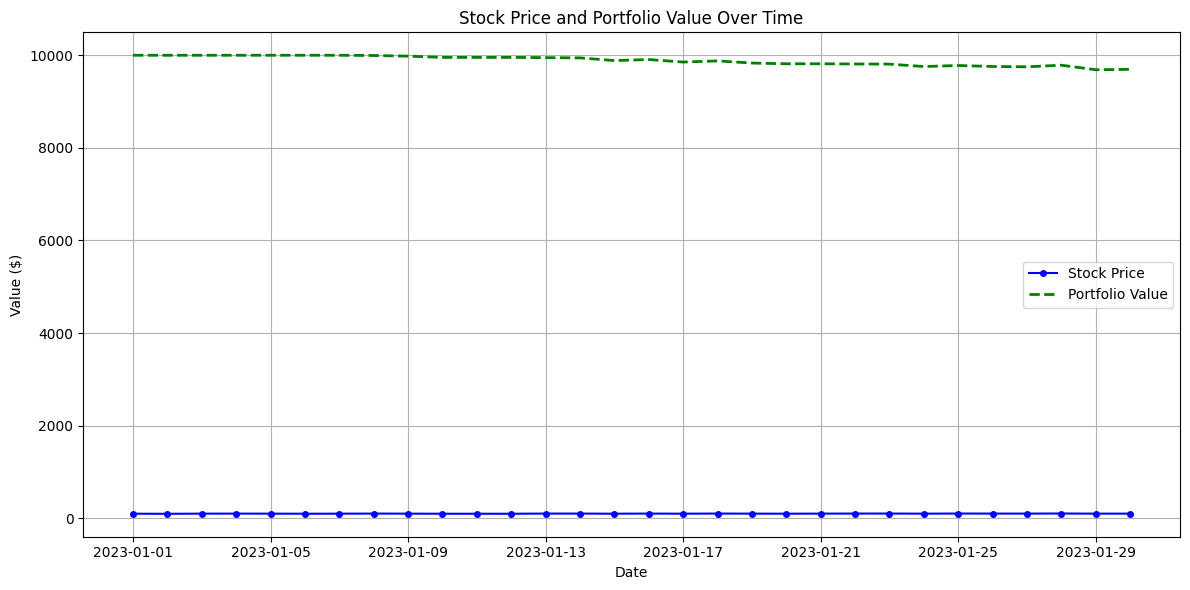


Plot displayed. You can analyze the trends.


In [7]:
print("\n--- Generating Performance Chart ---")

plt.figure(figsize=(12, 6))

# Plotting Stock Price
plt.plot(dates_history, stock_price_history, label='Stock Price', color='blue', marker='o', linestyle='-', markersize=4)

# Plotting Portfolio Value
plt.plot(dates_history, portfolio_value_history, label='Portfolio Value', color='green', linestyle='--', linewidth=2)

plt.title('Stock Price and Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.grid(True)
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\nPlot displayed. You can analyze the trends.")